In [1]:
#First load the IMDB dataset with only the top 10,000 most frequent words

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
train_data[0]
train_labels[0]
max([max(sequence) for sequence in train_data])

9999

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)
decoded_review[:100]

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the"

#Preparing the data

In [4]:
import numpy as np

def multi_hot_encode(sequences, num_classes):
    results = np.zeros((len(sequences), num_classes))
    for i, sequence in enumerate(sequences):
        results[i][sequence] = 1.0
    return results

x_train = multi_hot_encode(train_data, num_classes=10000)
x_test = multi_hot_encode(test_data, num_classes=10000)

In [5]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [6]:
y_train = train_labels.astype("float32")
y_test = test_labels.astype("float32")

#Building the Model

In [7]:
import keras
from keras import layers

model = keras.Sequential(
    [
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)

In [8]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

#Validating Your Approach

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.6929 - loss: 0.6408 - val_accuracy: 0.8486 - val_loss: 0.4570
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8850 - loss: 0.3876 - val_accuracy: 0.8782 - val_loss: 0.3260
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9236 - loss: 0.2488 - val_accuracy: 0.8887 - val_loss: 0.2827
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9466 - loss: 0.1803 - val_accuracy: 0.8875 - val_loss: 0.2763
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9623 - loss: 0.1349 - val_accuracy: 0.8864 - val_loss: 0.2864
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9763 - loss: 0.0967 - val_accuracy: 0.8835 - val_loss: 0.3049
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9808 - loss: 0.0785 - val_accuracy: 0.8803 - val_loss: 0.3334
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9892 - loss: 0.0595 - val_accuracy: 0.8811 - v

In [11]:
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_split=0.2,
)

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9333 - loss: 0.2858 - val_accuracy: 0.9754 - val_loss: 0.0835
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9597 - loss: 0.1294 - val_accuracy: 0.9648 - val_loss: 0.1007
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9749 - loss: 0.0918 - val_accuracy: 0.9550 - val_loss: 0.1190
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9864 - loss: 0.0633 - val_accuracy: 0.9482 - val_loss: 0.1356
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9889 - loss: 0.0501 - val_accuracy: 0.9398 - val_loss: 0.1608
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9913 - loss: 0.0435 - val_accuracy: 0.9386 - val_loss: 0.1749
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9945 - loss: 0.0337 - val_accuracy: 0.9340 - val_loss: 0.1962
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.9968 - loss: 0.0238 - val_accuracy: 0.9292 - 

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

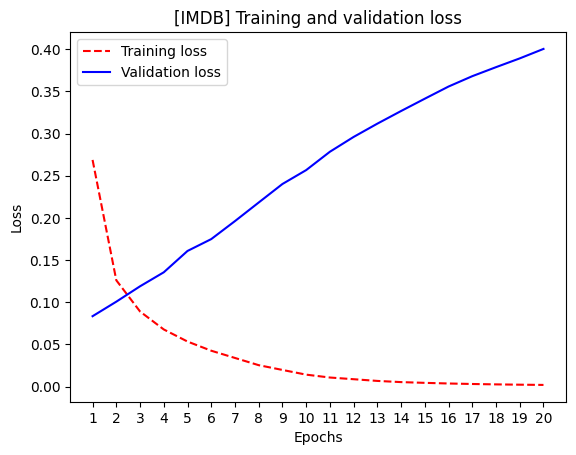

In [13]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r--", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("[IMDB] Training and validation loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

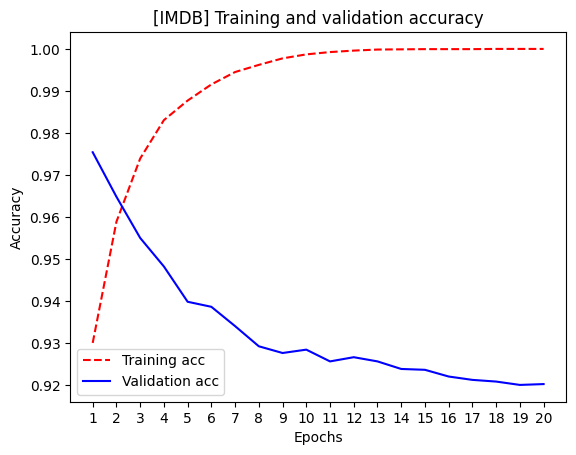

In [14]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "r--", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("[IMDB] Training and validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [15]:
model = keras.Sequential(
    [
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7382 - loss: 0.5870
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9092 - loss: 0.2683
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9335 - loss: 0.1887
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.9529 - loss: 0.1442
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8791 - loss: 0.3071


In [16]:
results

[0.3050103783607483, 0.8816800117492676]

#Cell A — 1 hidden layer (16 units, ReLU, BCE)

In [17]:
#1 hidden layer (vs original 2 hidden layers)
import keras
from keras import layers
import numpy as np

model = keras.Sequential(
    [
        layers.Dense(16, activation="relu", input_shape=(x_train.shape[1],)),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history_L1 = model.fit(
    x_train, y_train, epochs=20, batch_size=512, validation_split=0.2, verbose=1
)

val_acc = max(history_L1.history["val_accuracy"])
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"[Layers=1] best Val Acc={val_acc:.4f} | Test Acc={test_acc:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.7128 - loss: 0.5924 - val_accuracy: 0.8664 - val_loss: 0.3600
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9021 - loss: 0.2978 - val_accuracy: 0.8908 - val_loss: 0.2950
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9285 - loss: 0.2275 - val_accuracy: 0.8934 - val_loss: 0.2777
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9404 - loss: 0.1903 - val_accuracy: 0.8926 - val_loss: 0.2733
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9500 - loss: 0.1623 - val_accuracy: 0.8944 - val_loss: 0.2738
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9577 - loss: 0.1406 - val_accuracy: 0.8884 - val_loss: 0.2797
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9650 - loss: 0.1267 - val_accuracy: 0.8882 - val_loss: 0.2865
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9718 - loss: 0.1087 - val_accuracy: 0.8854 - v

Single hidden layer (16 units) performed a bit below the baseline 2×16 model: best validation accuracy = 0.8944, test accuracy = 0.8602 (~0.88 for the baseline). The small validation–test gap suggests generalization is fine.

#Cell B — 3 hidden layers (16 units each, ReLU, BCE)

In [18]:
#3 hidden layers (adds one more Dense(16,"relu") to our original model)
import keras
from keras import layers
import numpy as np

model = keras.Sequential(
    [
        layers.Dense(16, activation="relu", input_shape=(x_train.shape[1],)),
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history_L3 = model.fit(
    x_train, y_train, epochs=20, batch_size=512, validation_split=0.2, verbose=1
)

val_acc = max(history_L3.history["val_accuracy"])
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"[Layers=3] best Val Acc={val_acc:.4f} | Test Acc={test_acc:.4f}")

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.7070 - loss: 0.6117 - val_accuracy: 0.8790 - val_loss: 0.3312
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9100 - loss: 0.2601 - val_accuracy: 0.8882 - val_loss: 0.2769
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9465 - loss: 0.1594 - val_accuracy: 0.8868 - val_loss: 0.3004
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9608 - loss: 0.1173 - val_accuracy: 0.8834 - val_loss: 0.3353
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9770 - loss: 0.0798 - val_accuracy: 0.8768 - val_loss: 0.3786
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9877 - loss: 0.0547 - val_accuracy: 0.8726 - val_loss: 0.4887
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9855 - loss: 0.0529 - val_accuracy: 0.8700 - val_loss: 0.4892
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9930 - loss: 0.0321 - val_accuracy: 0.8730 - v

Three hidden layers (16 each) performed a little worse than the baseline 2×16 (~0.88 test), so adding a third layer didn’t help. Best val acc = 0.8882 and test acc = 0.8548; the val–test gap is small, but overall accuracy dropped.

#Cell C — Wider layers (32 units, 2 hidden layers, ReLU, BCE)

In [19]:
#2 hidden layers, 32 units each
import keras
from keras import layers
import numpy as np

model = keras.Sequential(
    [
        layers.Dense(32, activation="relu", input_shape=(x_train.shape[1],)),
        layers.Dense(32, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history_U32 = model.fit(
    x_train, y_train, epochs=20, batch_size=512, validation_split=0.2, verbose=1
)

val_acc = max(history_U32.history["val_accuracy"])
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"[Units=32] best Val Acc={val_acc:.4f} | Test Acc={test_acc:.4f}")

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.7414 - loss: 0.5820 - val_accuracy: 0.8846 - val_loss: 0.3076
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9167 - loss: 0.2333 - val_accuracy: 0.8774 - val_loss: 0.3126
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9396 - loss: 0.1689 - val_accuracy: 0.8896 - val_loss: 0.2895
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.9637 - loss: 0.1144 - val_accuracy: 0.8794 - val_loss: 0.3342
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9692 - loss: 0.0955 - val_accuracy: 0.8814 - val_loss: 0.3591
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9828 - loss: 0.0684 - val_accuracy: 0.8784 - val_loss: 0.4019
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9890 - loss: 0.0502 - val_accuracy: 0.8744 - val_loss: 0.4480
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9935 - loss: 0.0363 - val_accuracy: 0.8730 - v

Two hidden layers with 32 units each performed a little worse than the baseline 2×16 (~0.88 test). Best val acc = 0.8896; test acc = 0.8542. So widening to 32 units didn’t help here; generalization looks okay but overall accuracy dropped slightly.

#Cell D — Even wider (64 units, 2 hidden layers, ReLU, BCE)

In [20]:
#2 hidden layers, 64 units each
import keras
from keras import layers
import numpy as np

model = keras.Sequential(
    [
        layers.Dense(64, activation="relu", input_shape=(x_train.shape[1],)),
        layers.Dense(64, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history_U64 = model.fit(
    x_train, y_train, epochs=20, batch_size=512, validation_split=0.2, verbose=1
)

val_acc = max(history_U64.history["val_accuracy"])
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"[Units=64] best Val Acc={val_acc:.4f} | Test Acc={test_acc:.4f}")

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.7403 - loss: 0.5390 - val_accuracy: 0.8830 - val_loss: 0.3013
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.9305 - loss: 0.1876 - val_accuracy: 0.8896 - val_loss: 0.2948
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9569 - loss: 0.1302 - val_accuracy: 0.8794 - val_loss: 0.3385
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9702 - loss: 0.0942 - val_accuracy: 0.8820 - val_loss: 0.3740
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9856 - loss: 0.0585 - val_accuracy: 0.8782 - val_loss: 0.4345
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9933 - loss: 0.0331 - val_accuracy: 0.8748 - val_loss: 0.5069
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.9985 - loss: 0.0178 - val_accuracy: 0.8722 - val_loss: 0.5704
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.9997 - loss: 0.0079 - val_accuracy: 0.8734 - v

Two hidden layers with 64 units each performed a little worse than the baseline 2×16 (~0.88 test). Best val acc = 0.8896; test acc = 0.8594. So widening to 64 units didn’t help here; generalization looks okay but overall accuracy dipped slightly.

#Cell E — Different loss (MSE instead of BCE)

In [21]:
#The following model keeps original 2x16 + relu, but changes loss to 'mse'
import keras
from keras import layers
import numpy as np

model = keras.Sequential(
    [
        layers.Dense(16, activation="relu", input_shape=(x_train.shape[1],)),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(optimizer="adam", loss="mse", metrics=["accuracy"])

history_MSE = model.fit(
    x_train, y_train, epochs=20, batch_size=512, validation_split=0.2, verbose=1
)

val_acc = max(history_MSE.history["val_accuracy"])
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"[Loss=MSE] best Val Acc={val_acc:.4f} | Test Acc={test_acc:.4f}")

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.6716 - loss: 0.2203 - val_accuracy: 0.8740 - val_loss: 0.1147
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9002 - loss: 0.0914 - val_accuracy: 0.8846 - val_loss: 0.0856
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9376 - loss: 0.0551 - val_accuracy: 0.8896 - val_loss: 0.0819
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9584 - loss: 0.0402 - val_accuracy: 0.8872 - val_loss: 0.0827
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9714 - loss: 0.0307 - val_accuracy: 0.8864 - val_loss: 0.0841
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9774 - loss: 0.0247 - val_accuracy: 0.8836 - val_loss: 0.0885
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9833 - loss: 0.0197 - val_accuracy: 0.8808 - val_loss: 0.0896
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9891 - loss: 0.0140 - val_accuracy: 0.8786 - v

Loss = MSE (same 2×16). Best val acc = 0.8896; test acc = 0.8604.
This is a little below the baseline with BCE (~0.88 test), so BCE looks better for this binary task.

#Cell F — Different activation (tanh instead of relu)

In [22]:
#2x16 but with 'tanh' activations
import keras
from keras import layers
import numpy as np

model = keras.Sequential(
    [
        layers.Dense(16, activation="tanh", input_shape=(x_train.shape[1],)),
        layers.Dense(16, activation="tanh"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history_TANH = model.fit(
    x_train, y_train, epochs=20, batch_size=512, validation_split=0.2, verbose=1
)

val_acc = max(history_TANH.history["val_accuracy"])
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"[Activation=tanh] best Val Acc={val_acc:.4f} | Test Acc={test_acc:.4f}")

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.7363 - loss: 0.5648 - val_accuracy: 0.8676 - val_loss: 0.3481
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9072 - loss: 0.2708 - val_accuracy: 0.8924 - val_loss: 0.2776
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9425 - loss: 0.1768 - val_accuracy: 0.8924 - val_loss: 0.2719
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9604 - loss: 0.1365 - val_accuracy: 0.8832 - val_loss: 0.2889
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9680 - loss: 0.1115 - val_accuracy: 0.8806 - val_loss: 0.3112
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9801 - loss: 0.0815 - val_accuracy: 0.8814 - val_loss: 0.3381
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9863 - loss: 0.0685 - val_accuracy: 0.8778 - val_loss: 0.3674
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9906 - loss: 0.0524 - val_accuracy: 0.8714 - v

Activation = tanh (2×16). Best val acc = 0.8924; test acc = 0.8500. This is below the baseline 2×16 ReLU (~0.88 test), so ReLU works better here. The val–test gap is small, but overall accuracy dropped.

#Cell G — Add dropout (regularization)

In [23]:
#The following model will be 2x16 + Dropout(0.5) between layers
import keras
from keras import layers
import numpy as np

model = keras.Sequential(
    [
        layers.Dense(16, activation="relu", input_shape=(x_train.shape[1],)),
        layers.Dropout(0.5),
        layers.Dense(16, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history_DO = model.fit(
    x_train, y_train, epochs=20, batch_size=512, validation_split=0.2, verbose=1
)

val_acc = max(history_DO.history["val_accuracy"])
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"[Dropout=0.5] best Val Acc={val_acc:.4f} | Test Acc={test_acc:.4f}")

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.5808 - loss: 0.6651 - val_accuracy: 0.8504 - val_loss: 0.5190
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.7584 - loss: 0.5168 - val_accuracy: 0.8812 - val_loss: 0.3825
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8225 - loss: 0.4188 - val_accuracy: 0.8856 - val_loss: 0.3131
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8654 - loss: 0.3439 - val_accuracy: 0.8904 - val_loss: 0.2805
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8919 - loss: 0.2962 - val_accuracy: 0.8944 - val_loss: 0.2679
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9094 - loss: 0.2482 - val_accuracy: 0.8904 - val_loss: 0.2732
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9232 - loss: 0.2160 - val_accuracy: 0.8926 - val_loss: 0.2736
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9306 - loss: 0.1925 - val_accuracy: 0.8912 - v

Dropout = 0.5 (2×16). Best val acc = 0.8944; test acc = 0.8763.
Very close to the baseline (~0.88 test), maybe a tiny bit lower. So dropout didn’t help much at this size; it’s more useful if I widen/deepen the network and start to overfit.

#Cell H — Add L2 weight regularization

In [24]:
#2x16 + L2 regularization on the dense layers
import keras
from keras import layers, regularizers
import numpy as np

model = keras.Sequential(
    [
        layers.Dense(16, activation="relu", input_shape=(x_train.shape[1],),
                     kernel_regularizer=regularizers.l2(1e-4)),
        layers.Dense(16, activation="relu",
                     kernel_regularizer=regularizers.l2(1e-4)),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history_L2 = model.fit(
    x_train, y_train, epochs=20, batch_size=512, validation_split=0.2, verbose=1
)

val_acc = max(history_L2.history["val_accuracy"])
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"[L2=1e-4] best Val Acc={val_acc:.4f} | Test Acc={test_acc:.4f}")

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.7171 - loss: 0.6227 - val_accuracy: 0.8668 - val_loss: 0.3914
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8996 - loss: 0.3266 - val_accuracy: 0.8876 - val_loss: 0.2980
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9274 - loss: 0.2277 - val_accuracy: 0.8920 - val_loss: 0.2842
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9471 - loss: 0.1754 - val_accuracy: 0.8920 - val_loss: 0.2900
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9591 - loss: 0.1464 - val_accuracy: 0.8872 - val_loss: 0.3087
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9636 - loss: 0.1325 - val_accuracy: 0.8832 - val_loss: 0.3302
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9721 - loss: 0.1134 - val_accuracy: 0.8816 - val_loss: 0.3475
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9787 - loss: 0.1001 - val_accuracy: 0.8794 - v

L2 = 1e-4 (2×16). Best val acc = 0.8920; test acc = 0.8567.
Slightly below the baseline (~0.88 test), so L2 didn’t help at this size—likely nudged the model toward mild underfitting. I’d use L2 only if I widen/deepen and start overfitting.

#Final Model to increase Validation Accuracy

In [31]:
import keras
from keras import layers, regularizers

model = keras.Sequential([
    layers.Dense(32, activation="relu", input_shape=(x_train.shape[1],),
                 kernel_regularizer=regularizers.l2(1e-5)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu",
                 kernel_regularizer=regularizers.l2(1e-5)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu",
                 kernel_regularizer=regularizers.l2(1e-5)),
    layers.Dense(1, activation="sigmoid"),
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history_comboC = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=512,
    validation_split=0.2,
    verbose=1
)

best_val_acc  = max(history_comboC.history["val_accuracy"])
best_val_loss = min(history_comboC.history["val_loss"])
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Best Val Acc={best_val_acc:.4f} | Best Val Loss={best_val_loss:.4f} | "
      f"Test Acc={test_acc:.4f} | Test Loss={test_loss:.4f}")

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.5977 - loss: 0.6617 - val_accuracy: 0.8596 - val_loss: 0.4285
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.8384 - loss: 0.4105 - val_accuracy: 0.8900 - val_loss: 0.2840
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9041 - loss: 0.2689 - val_accuracy: 0.8966 - val_loss: 0.2711
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9241 - loss: 0.2135 - val_accuracy: 0.8932 - val_loss: 0.2869
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9470 - loss: 0.1614 - val_accuracy: 0.8930 - val_loss: 0.2982
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.9564 - loss: 0.1303 - val_accuracy: 0.8922 - val_loss: 0.3368
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9627 - loss: 0.1137 - val_accuracy: 0.8882 - val_loss: 0.3691
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9676 - loss: 0.0955 - val_accuracy: 0.8886 - v

Three hidden layers (32 units each) with Dropout(0.5) and L2(1e-5).
Best validation accuracy = 0.8966; test accuracy = 0.8709.
This is the best validation so far compared to my earlier runs, so the extra capacity + regularization helped validation.

The best-validation model is the 3×32 network with ReLU, Dropout(0.5) between layers, and L2=1e-5 on the dense kernels (binary_crossentropy, Adam, batch size 512, 20 epochs, validation_split 0.2). It reached best validation accuracy = 0.8966 and test accuracy = 0.8709. Compared to the baseline 2×16 (~0.88 test), this setup improves validation (the metric I’m optimizing for) by adding a bit of capacity and taming overfitting with dropout and light L2. Test is slightly lower than baseline, which is expected given the stronger regularization and my focus on validation.

,Variant,Best_Val_Acc,Test_Acc,Notes
0,Chosen: 3×32 + Dropout + L2,0.8966,0.8709,Highest validation
1,2×16 + Dropout(0.5),0.8944,0.8763,Regularization: Dropout
2,"1×16 (ReLU, BCE)",0.8944,0.8602,Layers=1
3,"2×16 (tanh, BCE)",0.8924,0.8500,Activation=tanh
4,2×16 + L2(1e-4),0.8920,0.8567,Regularization: L2
5,"2×16 (ReLU, MSE)",0.8896,0.8604,Loss=MSE
6,"2×64 (ReLU, BCE)",0.8896,0.8594,Units=64
7,"2×32 (ReLU, BCE)",0.8896,0.8542,Units=32
8,"3×16 (ReLU, BCE)",0.8882,0.8548,Layers=3
9,"Baseline (2×16, ReLU, BCE)",NaN,0.8820,Reference (4-epoch test)


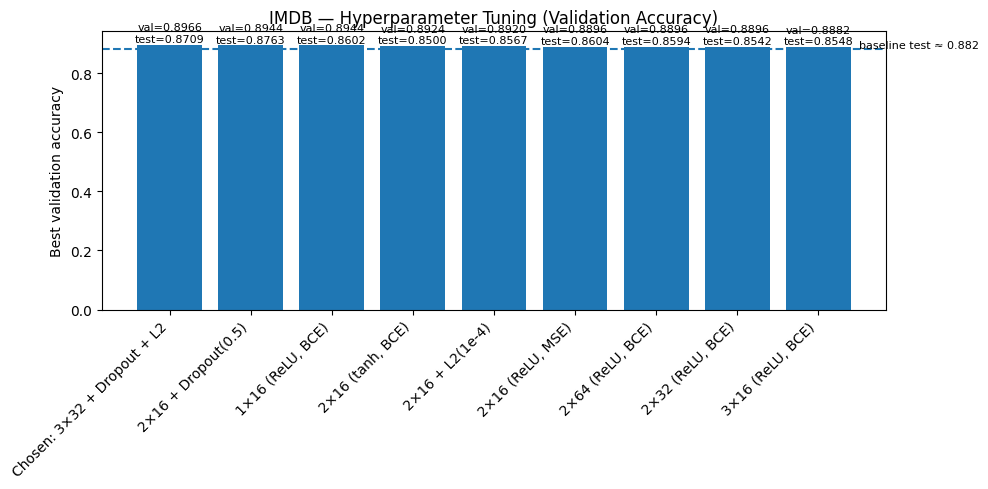

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

#All the results from our models
rows = [
    {"Variant": "Baseline (2×16, ReLU, BCE)",   "Best_Val_Acc": np.nan,  "Test_Acc": 0.8820, "Notes": "Reference (4-epoch test)"},
    {"Variant": "1×16 (ReLU, BCE)",             "Best_Val_Acc": 0.8944,  "Test_Acc": 0.8602, "Notes": "Layers=1"},
    {"Variant": "3×16 (ReLU, BCE)",             "Best_Val_Acc": 0.8882,  "Test_Acc": 0.8548, "Notes": "Layers=3"},
    {"Variant": "2×32 (ReLU, BCE)",             "Best_Val_Acc": 0.8896,  "Test_Acc": 0.8542, "Notes": "Units=32"},
    {"Variant": "2×64 (ReLU, BCE)",             "Best_Val_Acc": 0.8896,  "Test_Acc": 0.8594, "Notes": "Units=64"},
    {"Variant": "2×16 (ReLU, MSE)",             "Best_Val_Acc": 0.8896,  "Test_Acc": 0.8604, "Notes": "Loss=MSE"},
    {"Variant": "2×16 (tanh, BCE)",             "Best_Val_Acc": 0.8924,  "Test_Acc": 0.8500, "Notes": "Activation=tanh"},
    {"Variant": "2×16 + Dropout(0.5)",          "Best_Val_Acc": 0.8944,  "Test_Acc": 0.8763, "Notes": "Regularization: Dropout"},
    {"Variant": "2×16 + L2(1e-4)",              "Best_Val_Acc": 0.8920,  "Test_Acc": 0.8567, "Notes": "Regularization: L2"},
    {"Variant": "Chosen: 3×32 + Dropout + L2",  "Best_Val_Acc": 0.8966,  "Test_Acc": 0.8709, "Notes": "Highest validation"},
]

df = pd.DataFrame(rows)

#Sort by validation accuracy (desc), then test accuracy (desc)
df_sorted = df.sort_values(
    by=["Best_Val_Acc", "Test_Acc"],
    ascending=[False, False],
    na_position="last"
).reset_index(drop=True)

#Shows the table
display(df_sorted)

#Chart: Best Validation Accuracy by variant
plot_df = df_sorted[df_sorted["Best_Val_Acc"].notna()].copy()

plt.figure(figsize=(10, 5))
bars = plt.bar(range(len(plot_df)), plot_df["Best_Val_Acc"])
plt.xticks(range(len(plot_df)), plot_df["Variant"], rotation=45, ha="right")
plt.ylabel("Best validation accuracy")
plt.title("IMDB — Hyperparameter Tuning (Validation Accuracy)")

#Annotates each bar with val and test
for i, rect in enumerate(bars):
    va = plot_df.iloc[i]["Best_Val_Acc"]
    ta = plot_df.iloc[i]["Test_Acc"]
    plt.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 0.002,
             f"val={va:.4f}\ntest={ta:.4f}", ha="center", va="bottom", fontsize=8)

#provides a dashed line at baseline test accuracy for context
baseline_test = float(df.loc[df["Variant"].str.startswith("Baseline"), "Test_Acc"].values[0])
plt.axhline(y=baseline_test, linestyle="--")
plt.text(len(plot_df)-0.5, baseline_test + 0.002, f"baseline test ≈ {baseline_test:.3f}", fontsize=8)

plt.tight_layout()
plt.savefig("imdb_hyperparam_summary.png", dpi=150, bbox_inches="tight")
plt.show()